## **Platform churn prediction**

# EDA

In [285]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["font.size"] = 12

In [286]:
df = pd.read_csv("Telco Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [287]:
df.shape

(7043, 21)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [289]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [290]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [291]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [292]:
df = df.dropna(subset=["TotalCharges"])
df.shape

(7032, 21)

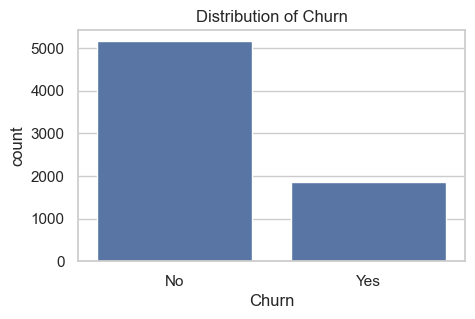

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [293]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.show()

df["Churn"].value_counts(normalize=True) * 100

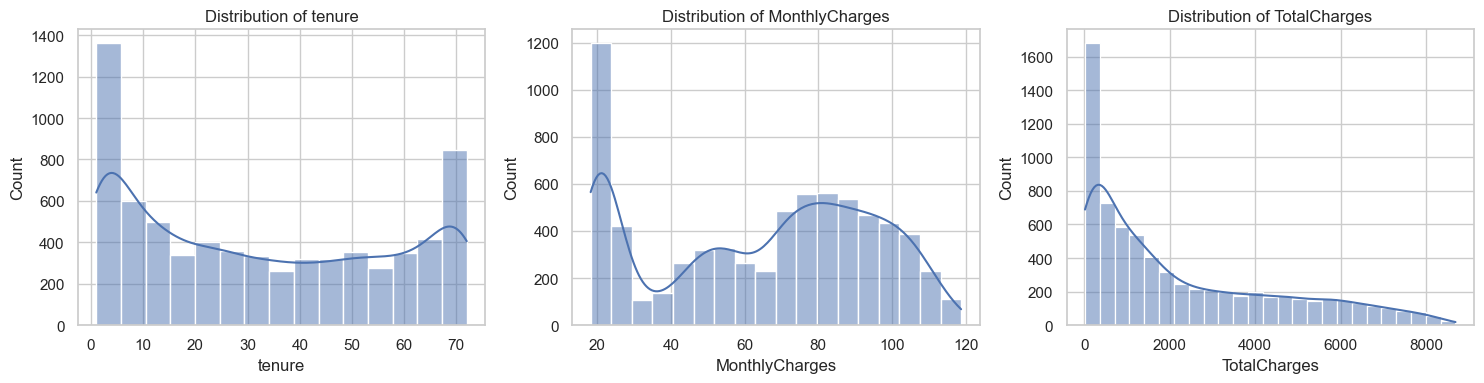

In [294]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

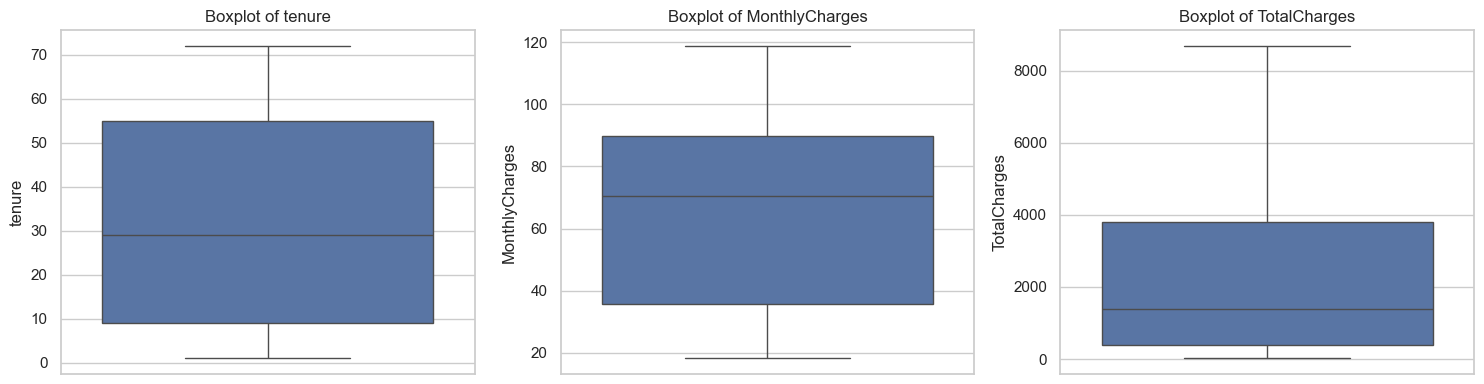

In [295]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col in zip(axes, numeric_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()



Churn rate by gender:

Churn         No       Yes
gender                    
Female  0.730405  0.269595
Male    0.737954  0.262046

Churn rate by SeniorCitizen:

Churn                No       Yes
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813

Churn rate by Partner:

Churn          No       Yes
Partner                    
No       0.670239  0.329761
Yes      0.802829  0.197171

Churn rate by Dependents:

Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.844688  0.155312

Churn rate by PhoneService:

Churn               No       Yes
PhoneService                    
No            0.750000  0.250000
Yes           0.732525  0.267475

Churn rate by MultipleLines:

Churn                   No       Yes
MultipleLines                       
No                0.749188  0.250812
No phone service  0.750000  0.250000
Yes               0.713515  0.286485

Churn rate by InternetService:

C

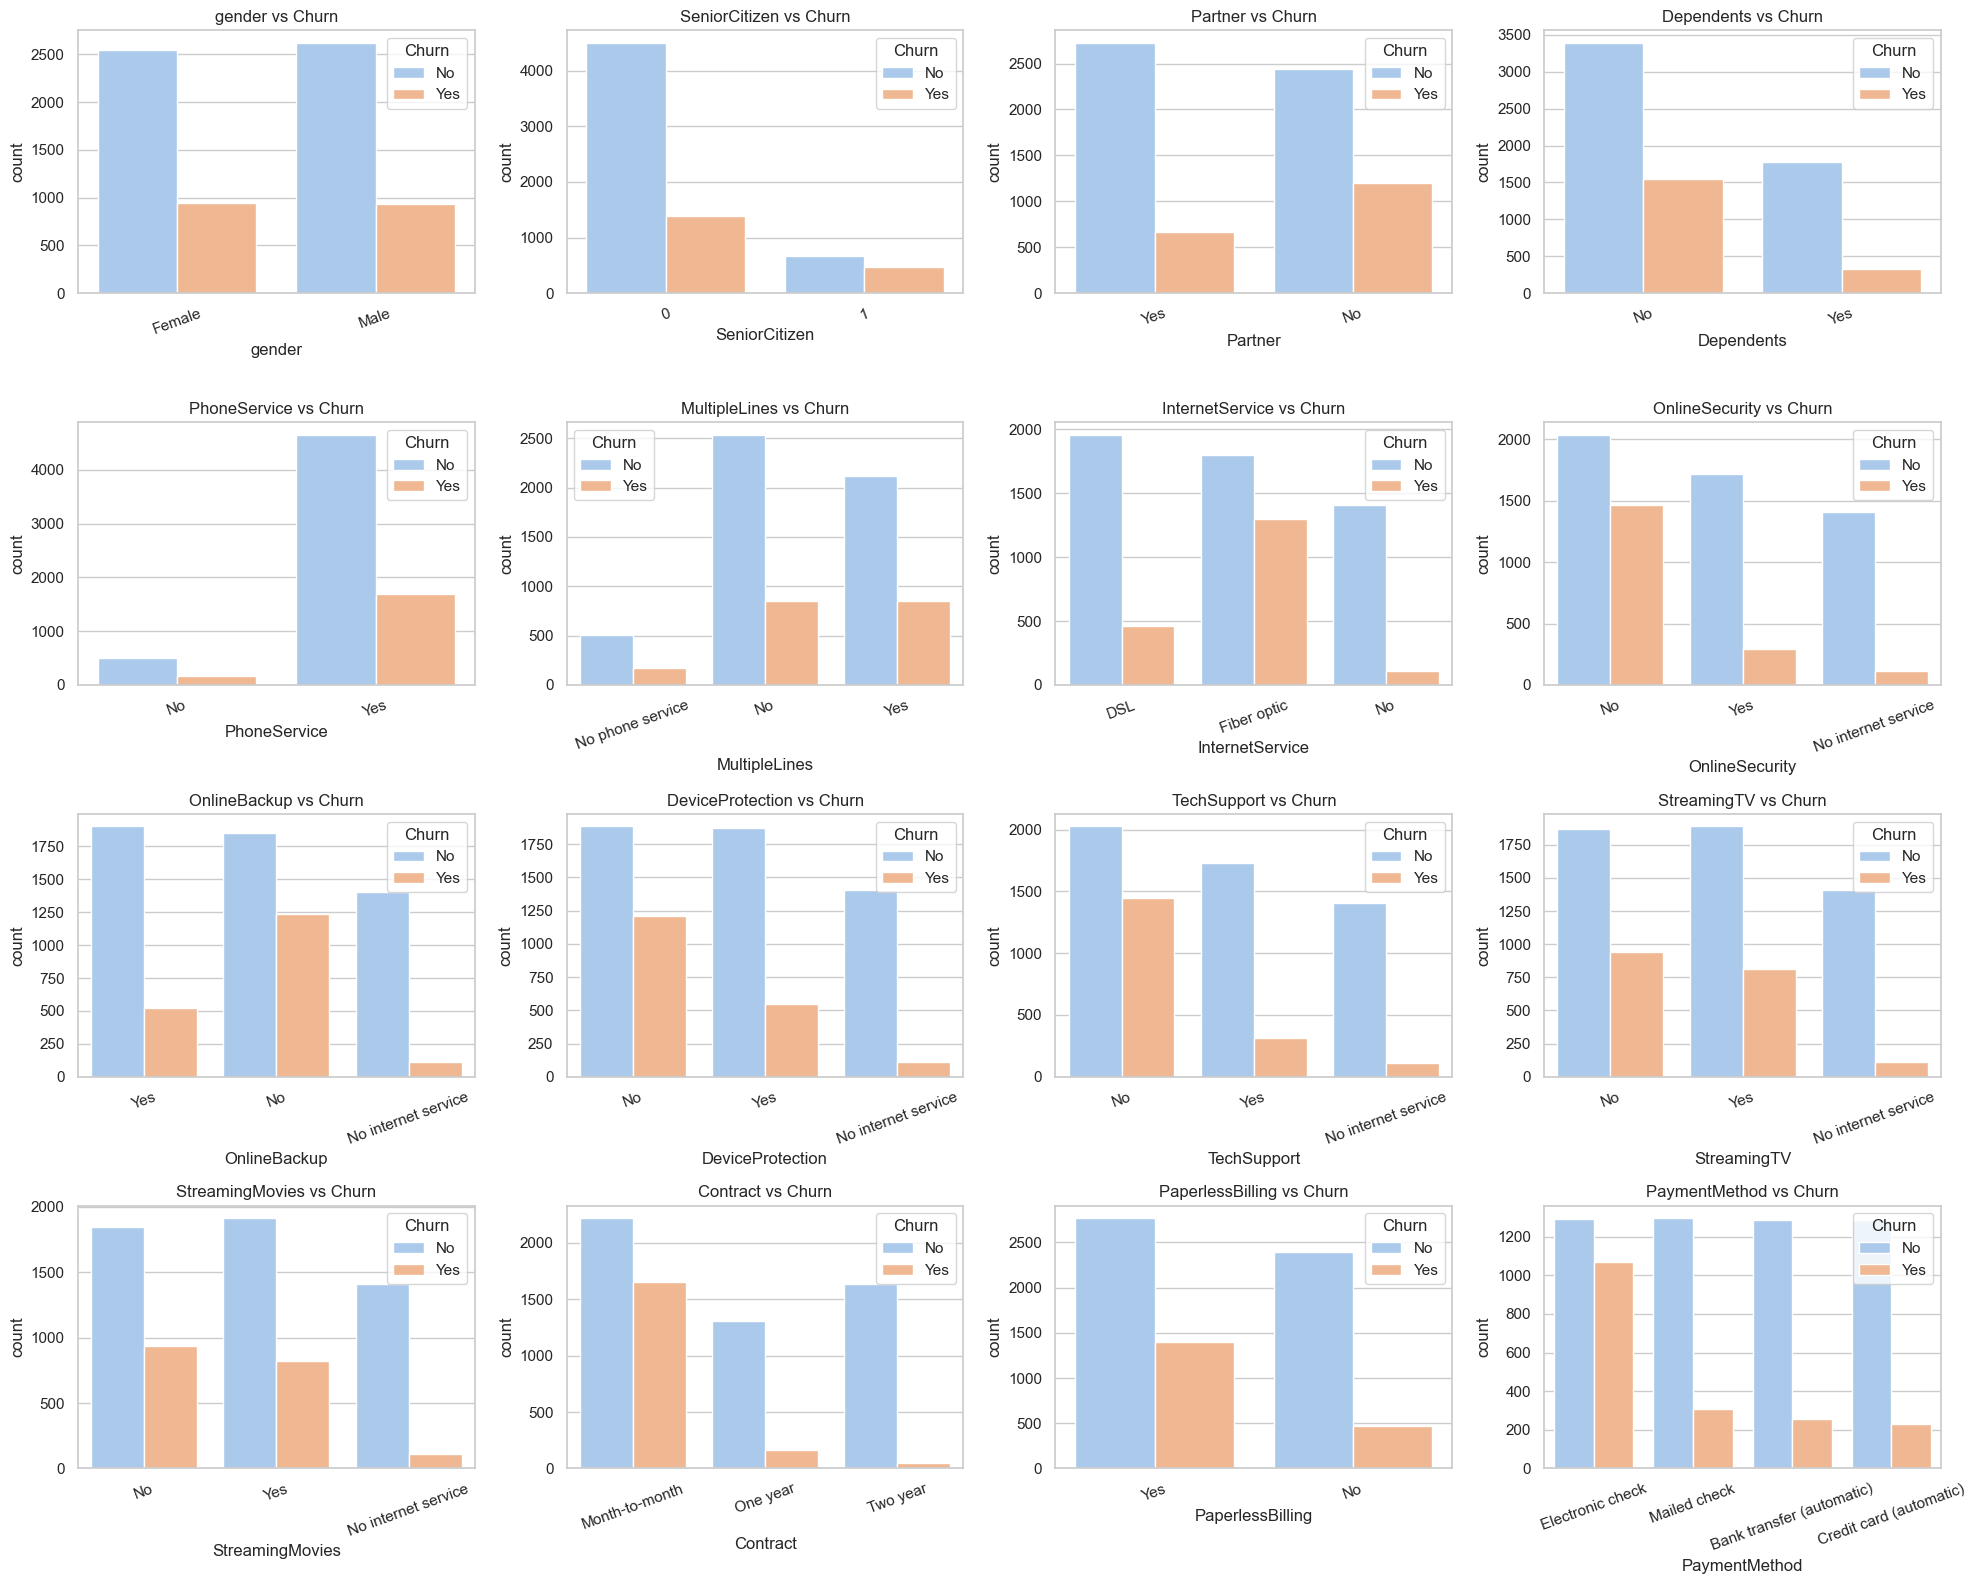

In [296]:
import math

categorical_cols = ["gender","SeniorCitizen","Partner","Dependents",
                    "PhoneService","MultipleLines","InternetService",
                    "OnlineSecurity","OnlineBackup","DeviceProtection",
                    "TechSupport","StreamingTV","StreamingMovies",
                    "Contract","PaperlessBilling","PaymentMethod"]

n_cols_per_row = 4
n_rows = math.ceil(len(categorical_cols) / n_cols_per_row)

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    print(f"\nChurn rate by {col}:\n")
    print(pd.crosstab(df[col], df["Churn"], normalize="index"))

    sns.countplot(x=col, hue="Churn", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=20)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Preprocess

In [297]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [298]:
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows


Number of duplicate rows: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [299]:
df = df.drop(columns=["customerID"])

In [300]:
# Outlier detection
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")

tenure: 0 outliers
MonthlyCharges: 0 outliers
TotalCharges: 0 outliers


In [301]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

binary_cols = ["SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]

categorical_cols = ["gender", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
"DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod"]

In [302]:
binary_mapping = {"Yes": 1, "No": 0}

for col in binary_cols:
    if df[col].dtype == "object":
        df[col] = df[col].map(binary_mapping)

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [303]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


In [304]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Clustering

In [305]:
from sklearn.cluster import KMeans

cluster_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "SeniorCitizen",
    "Contract_One year", 
    "Contract_Two year",
    "PaperlessBilling"
]

n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

df["cluster"] = kmeans.fit_predict(df[cluster_features])
print(df["cluster"].value_counts())
df.head()


cluster
1    3875
2    1685
0    1472
Name: count, dtype: int64


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,cluster
0,0,1,0,0.000000,0,1,0.115423,0.001275,0,False,...,False,False,False,False,False,False,False,True,False,1
1,0,0,0,0.464789,1,0,0.385075,0.215867,0,True,...,False,False,False,False,True,False,False,False,True,0
2,0,0,0,0.014085,1,1,0.354229,0.010310,1,True,...,False,False,False,False,False,False,False,False,True,1
3,0,0,0,0.619718,0,0,0.239303,0.210241,0,True,...,False,False,False,False,True,False,False,False,False,0
4,0,0,0,0.014085,1,1,0.521891,0.015330,1,False,...,False,False,False,False,False,False,False,True,False,1


# BII

In [306]:
usage_cols = ["tenure", "StreamingTV_Yes", "StreamingMovies_Yes"]
cost_cols = ["MonthlyCharges", "TotalCharges"]
engagement_cols = ["OnlineSecurity_Yes", "OnlineBackup_Yes", 
                   "DeviceProtection_Yes", "TechSupport_Yes", "PhoneService"]

df["BII"] = (
    abs(df[usage_cols].mean(axis=1) - df[cost_cols].mean(axis=1)) +
    abs(df[usage_cols].mean(axis=1) - df[engagement_cols].mean(axis=1)) +
    abs(df[cost_cols].mean(axis=1) - df[engagement_cols].mean(axis=1))
)
df["BII"] = df["BII"].astype(float)
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,cluster,BII
0,0,1,0,0.000000,0,1,0.115423,0.001275,0,False,...,False,False,False,False,False,False,True,False,1,0.400000
1,0,0,0,0.464789,1,0,0.385075,0.215867,0,True,...,False,False,False,True,False,False,False,True,0,0.890141
2,0,0,0,0.014085,1,1,0.354229,0.010310,1,True,...,False,False,False,False,False,False,False,True,1,1.190610
3,0,0,0,0.619718,0,0,0.239303,0.210241,0,True,...,False,False,False,True,False,False,False,False,0,0.786854
4,0,0,0,0.014085,1,1,0.521891,0.015330,1,False,...,False,False,False,False,False,False,True,False,1,0.527831


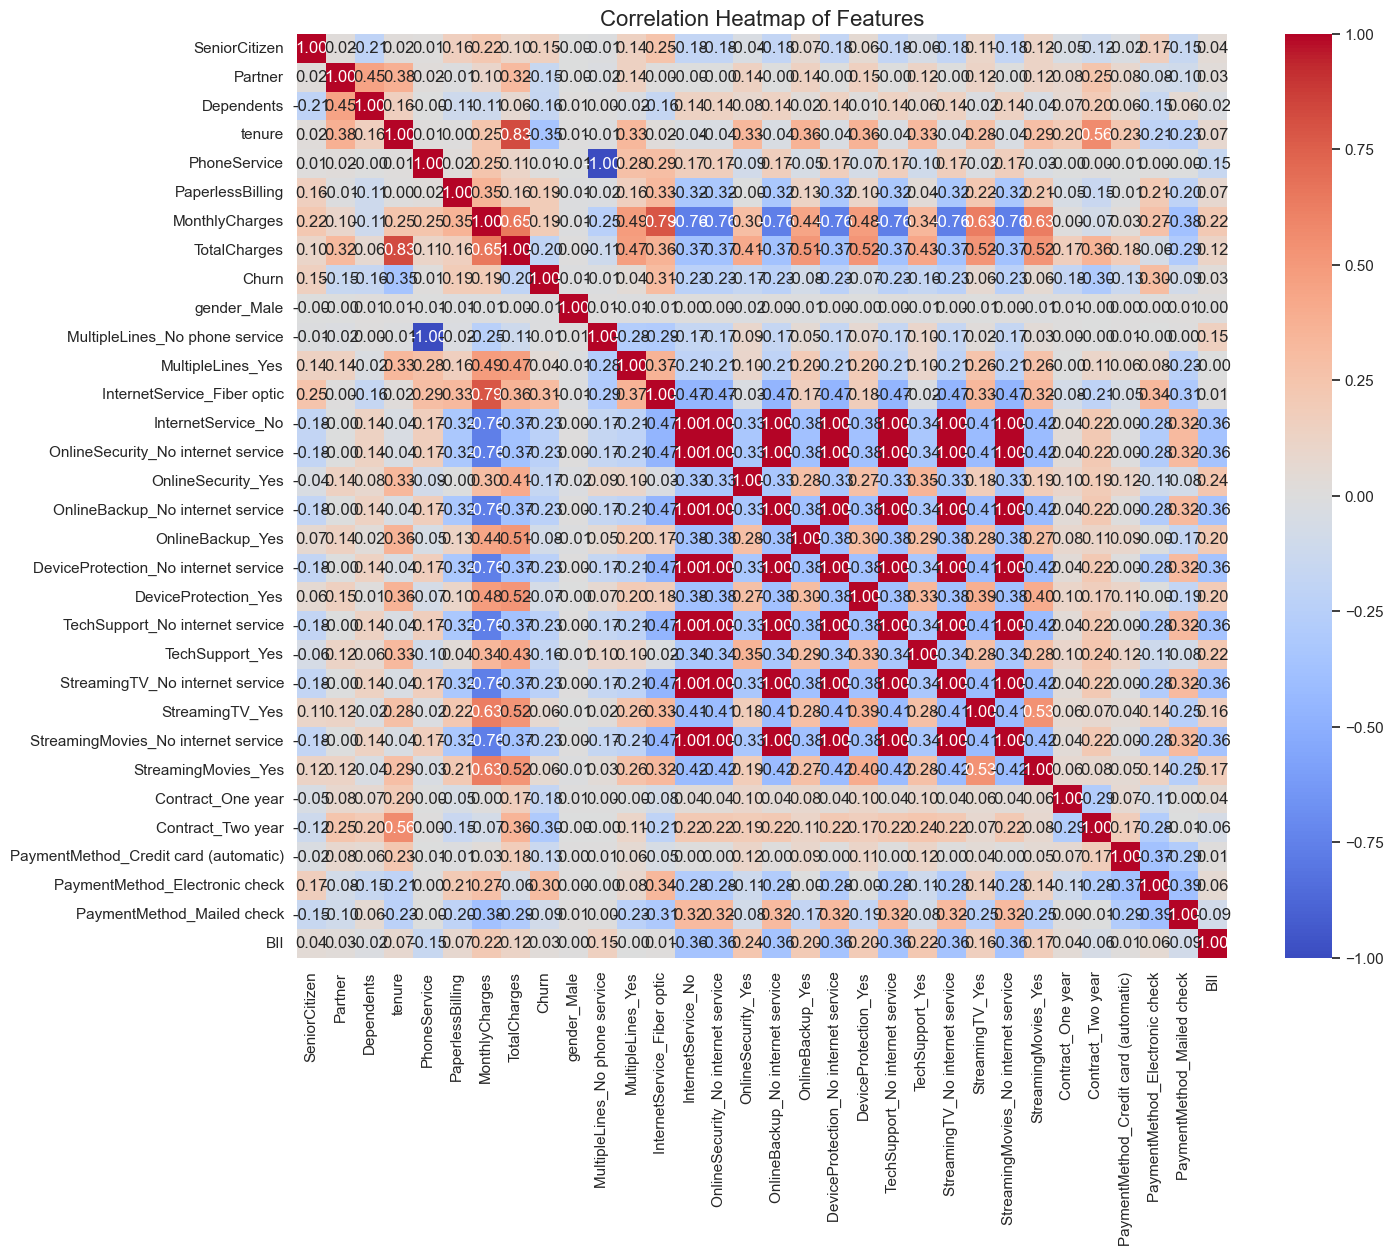

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=["float64", "int64", "bool"]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

In [308]:
corr_matrix = df.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print("Columns to drop due to high correlation:", to_drop)
df.drop(columns=to_drop, inplace=True)

df.head()

Columns to drop due to high correlation: ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,cluster,BII
0,0,1,0,0.000000,0,1,0.115423,0.001275,0,False,...,False,False,False,False,False,False,True,False,1,0.400000
1,0,0,0,0.464789,1,0,0.385075,0.215867,0,True,...,False,False,False,True,False,False,False,True,0,0.890141
2,0,0,0,0.014085,1,1,0.354229,0.010310,1,True,...,False,False,False,False,False,False,False,True,1,1.190610
3,0,0,0,0.619718,0,0,0.239303,0.210241,0,True,...,True,False,False,True,False,False,False,False,0,0.786854
4,0,0,0,0.014085,1,1,0.521891,0.015330,1,False,...,False,False,False,False,False,False,True,False,1,0.527831


# model

Accuracy: 0.7846481876332623

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



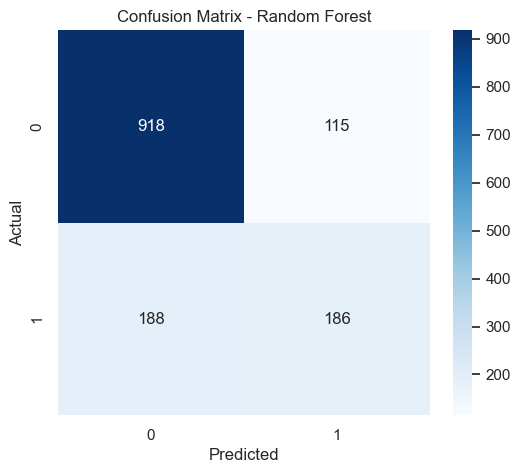

In [309]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=["Churn"]) 
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Accuracy: 0.7739872068230277

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.53      0.56       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



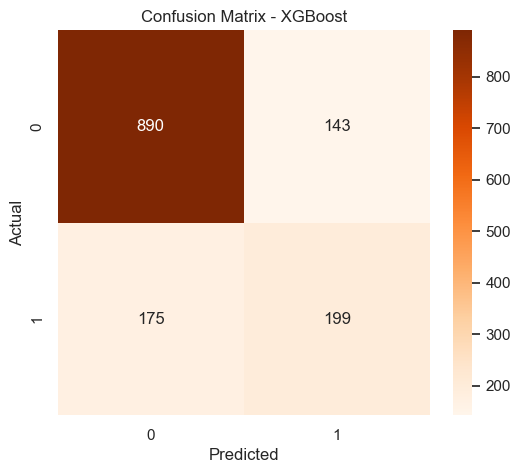

In [311]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=["Churn"]) 
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()
